**ScRNA-Seq Differential Analysis with Scanpy-A python Package**

The dataset for this analysis was downloaded from 10x Genomics [here](http://www.10xgenomics.com/resources/datasets/20-k-1-1-mixture-of-human-hek-293-t-and-mouse-nih-3-t-3-cells-3-ht-v-3-1-3-1-high-6-1-0)

The Scanpy Documentation can be found [here](http://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)


Scanpy is similar to Seurat package in R

**Download the Dataset**

In [45]:
!mkdir dataset 
!wget https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_hgmm_3p_nextgem_Chromium_X/10k_hgmm_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz -O dataset/human_mouse.tar.gz

!cd dataset; tar -xzf human_mouse.tar.gz
!mkdir write

mkdir: cannot create directory ‘dataset’: File exists
--2021-10-23 12:30:24--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_hgmm_3p_nextgem_Chromium_X/10k_hgmm_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163106267 (156M) [application/x-tar]
Saving to: ‘dataset/human_mouse.tar.gz’

dataset/human_mouse 100%[===================>] 155.55M  85.8MB/s    in 1.8s    

2021-10-23 12:30:26 (85.8 MB/s) - ‘dataset/human_mouse.tar.gz’ saved [163106267/163106267]

mkdir: cannot create directory ‘write’: File exists


In [46]:
#check if mtx file in dataset folder
#!cd dataset/filtered_feature_bc_matrix/

#!ls dataset/
#!ls dataset/filtered_feature_bc_matrix

**Install Packgages**

In [47]:
!pip install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

In [48]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
#data analysed will be stored here
results_file = 'write/human_mouse.h5ad'

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.7.1 pandas==1.3.3 scikit-learn==0.23.2 statsmodels==0.12.2 python-igraph==0.9.6 pynndescent==0.5.4


**Read in the Data into AnnData format**

In [49]:
adata = sc.read_10x_mtx(
    'dataset/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

... reading from cache file cache/dataset-filtered_feature_bc_matrix-matrix.h5ad


In [50]:
adata.var_names_make_unique()

**Data Exploration**

In [51]:
adata

AnnData object with n_obs × n_vars = 9545 × 68886
    var: 'gene_ids', 'feature_types'

In [52]:
#make a copy of the data
adata2=adata.copy()

In [53]:
adata2.obs.head()

Empty DataFrame
Columns: []
Index: [AAACCCAAGACGGTCA-1, AAACCCAAGTATGGAT-1, AAACCCAAGTGGACGT-1, AAACCCACAAGATCCT-1, AAACCCACAGCTGTTA-1]

In [54]:
adata2.var.head()

gene_ids    feature_types
GRCh38_MIR1302-2HG  GRCh38_ENSG00000243485  Gene Expression
GRCh38_FAM138A      GRCh38_ENSG00000237613  Gene Expression
GRCh38_OR4F5        GRCh38_ENSG00000186092  Gene Expression
GRCh38_AL627309.1   GRCh38_ENSG00000238009  Gene Expression
GRCh38_AL627309.3   GRCh38_ENSG00000239945  Gene Expression

In [55]:
adata2.var_names

Index(['GRCh38_MIR1302-2HG', 'GRCh38_FAM138A', 'GRCh38_OR4F5',
       'GRCh38_AL627309.1', 'GRCh38_AL627309.3', 'GRCh38_AL627309.2',
       'GRCh38_AL627309.5', 'GRCh38_AL627309.4', 'GRCh38_AP006222.2',
       'GRCh38_AL732372.1',
       ...
       'mm10___Gm16367', 'mm10___AC163611.1', 'mm10___AC163611.2',
       'mm10___AC140365.1', 'mm10___AC124606.2', 'mm10___AC124606.1',
       'mm10___AC133095.2', 'mm10___AC133095.1', 'mm10___AC234645.1',
       'mm10___AC149090.1'],
      dtype='object', length=68886)

normalizing counts per cell
    finished (0:00:00)


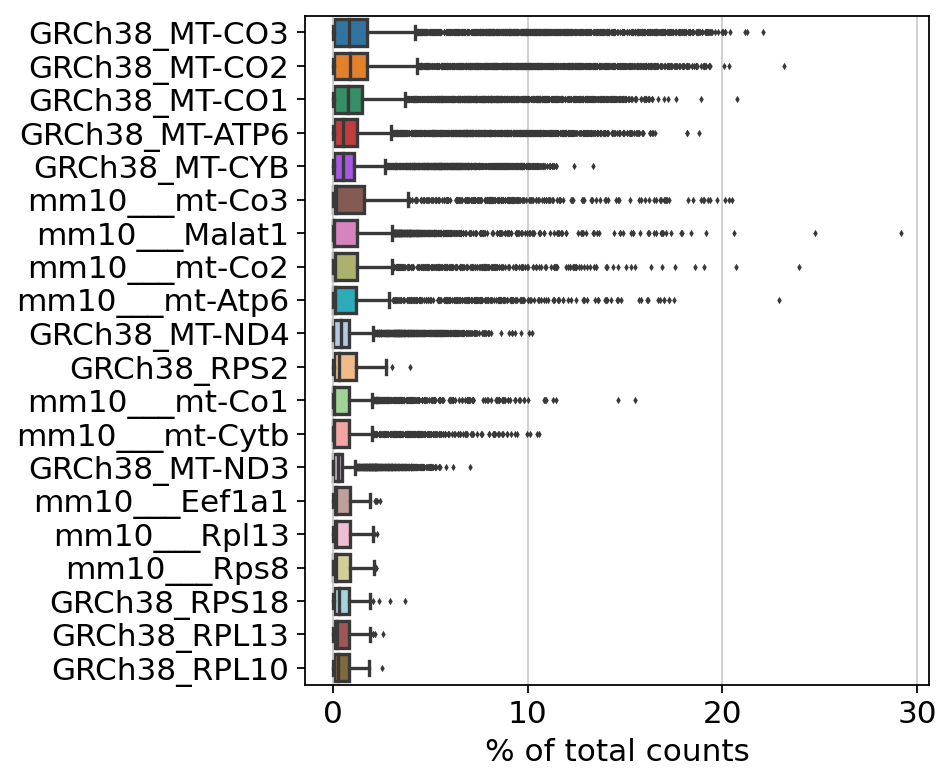

In [56]:
#visualizing the top 20 expressed genes
sc.pl.highest_expr_genes(adata2, n_top=20, )

**Quality Control checks**

The mt counts are usually used in checking the quality of the reads

In [57]:
 # annotate the group of mitochondrial genes as 'mt'
adata2.var['mt'] = adata2.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical


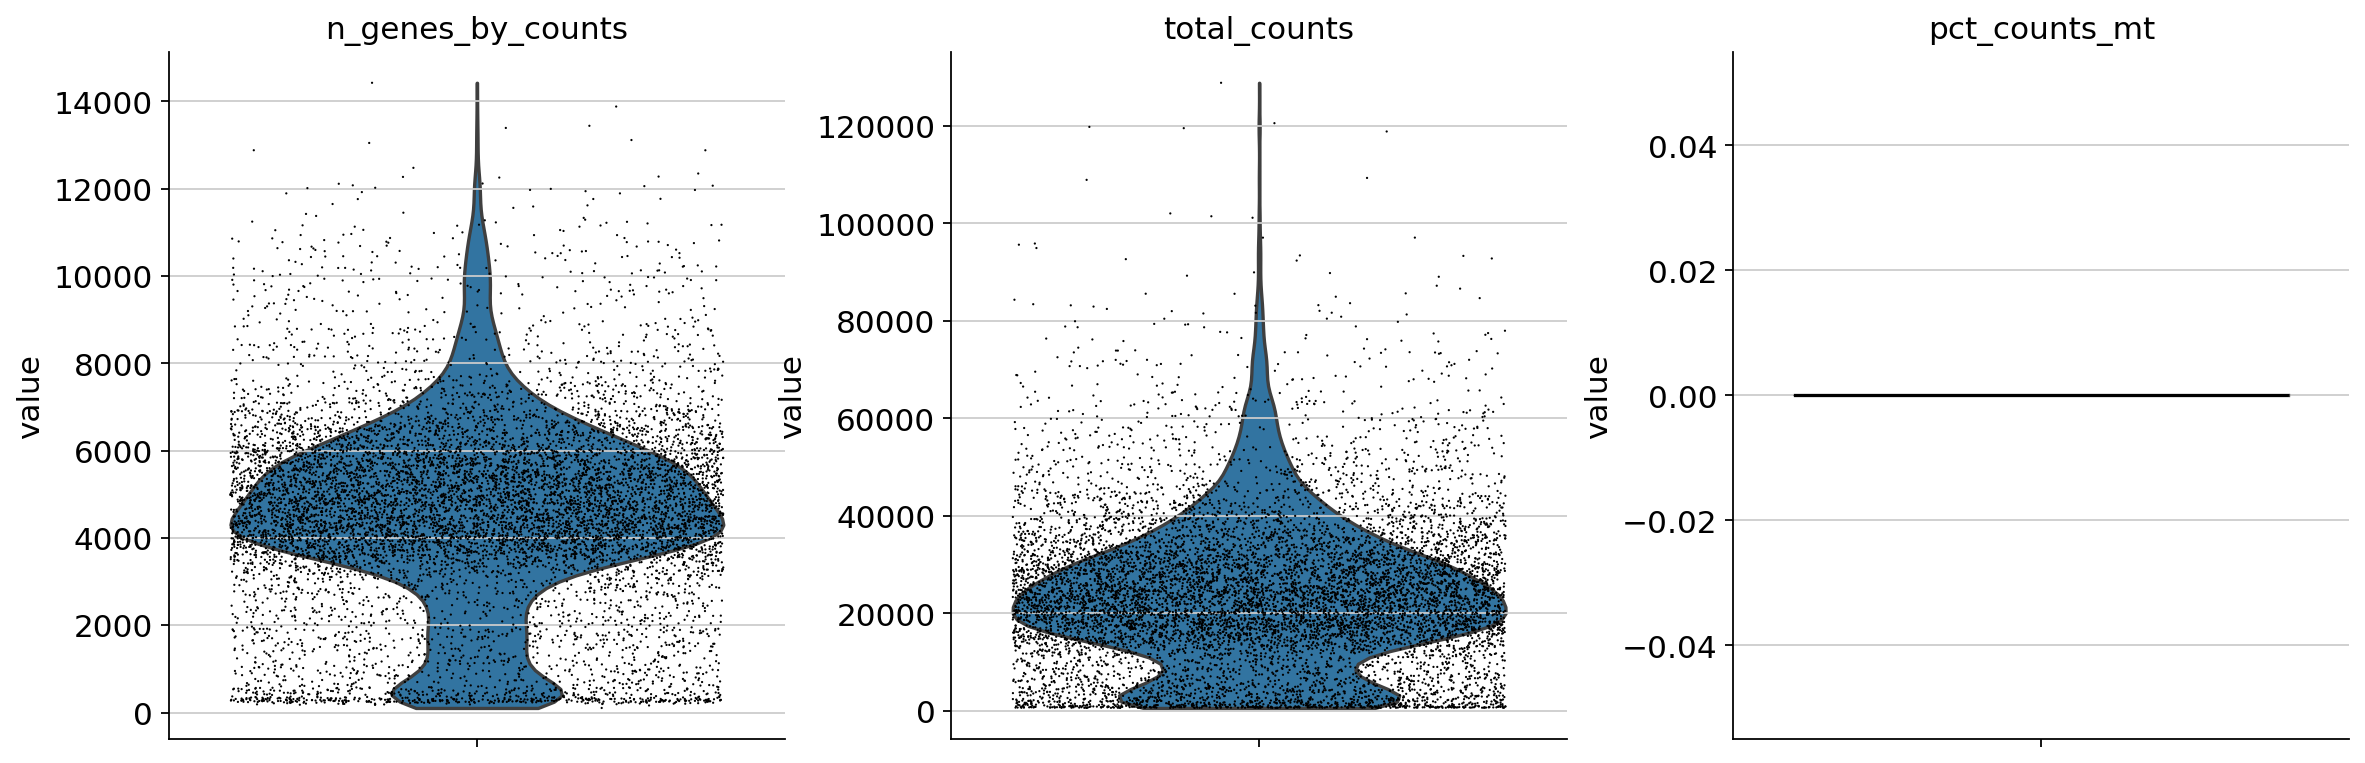

In [58]:
#visualise the counts
sc.pl.violin(adata2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [59]:
adata2.var['mt']

GRCh38_MIR1302-2HG    False
GRCh38_FAM138A        False
GRCh38_OR4F5          False
GRCh38_AL627309.1     False
GRCh38_AL627309.3     False
                      ...  
mm10___AC124606.1     False
mm10___AC133095.2     False
mm10___AC133095.1     False
mm10___AC234645.1     False
mm10___AC149090.1     False
Name: mt, Length: 68886, dtype: bool

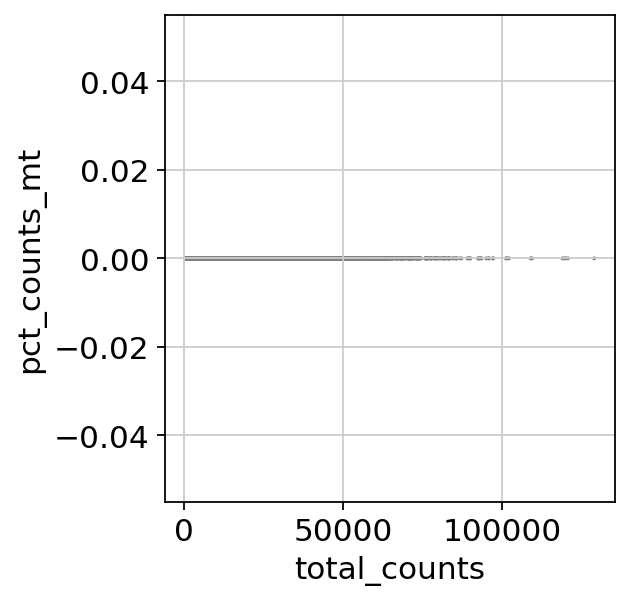

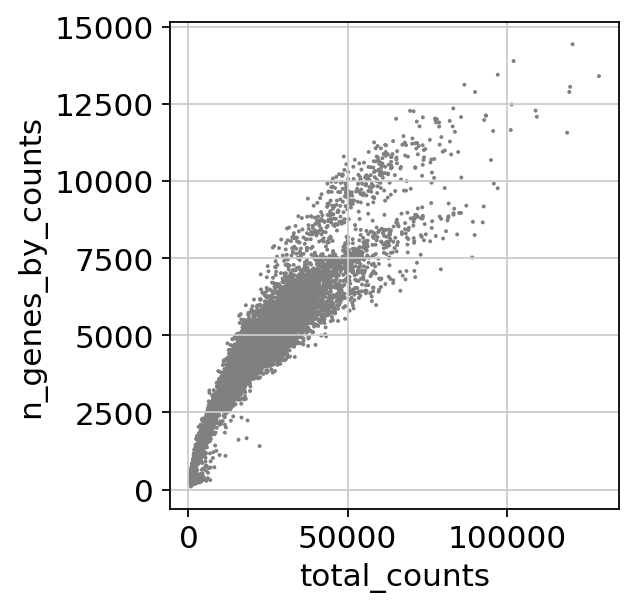

In [60]:
#compare the pct_counts_mt and n_genes_by_counts to total_counts
sc.pl.scatter(adata2, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata2, x='total_counts', y='n_genes_by_counts')

**Normalization**

normalizing counts per cell
    finished (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:03)


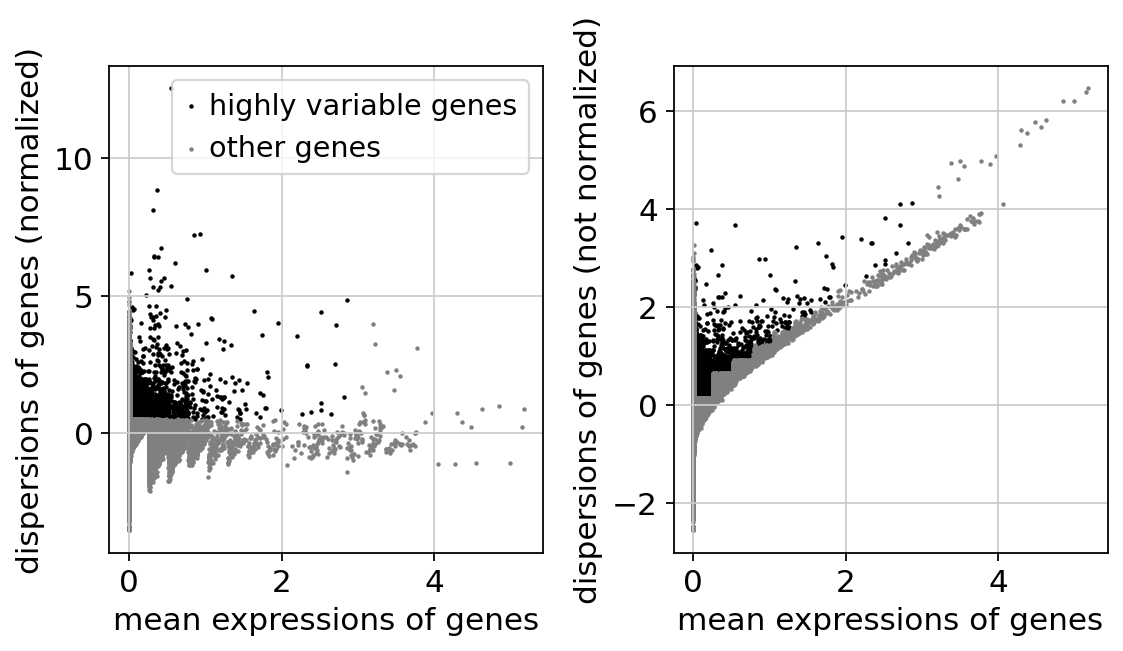

In [61]:
adata2.raw =sc.pp.normalize_total(adata2, copy=True)
sc.pp.normalize_per_cell(adata2,counts_per_cell_after=1e4)
filter_results=sc.pp.filter_genes_dispersion(adata2.X,min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_results)

In [62]:
adata2

AnnData object with n_obs × n_vars = 9545 × 68886
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

**Filter variable genes**

In [63]:
sum(filter_results.gene_subset)/len(filter_results.gene_subset)*100

14.934819847283917

In [64]:
# subset to highly variable genes
adata3 = adata2[:, filter_results.gene_subset].copy()

In [65]:
adata3.shape[1]

10288

In [66]:
adata3

AnnData object with n_obs × n_vars = 9545 × 10288
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [67]:
adata3.raw.to_adata()

AnnData object with n_obs × n_vars = 9545 × 68886
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

**Dimensionality Reduction and Classification**

In [68]:
# normalize the columns (genes)

sc.pp.scale(adata3)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [69]:
#pca
sc.tl.pca(adata3)

computing PCA
    with n_comps=50
    finished (0:00:16)


In [70]:
adata3.obsm["X_pca"].shape

(9545, 50)

In [71]:
# compute nearest neighbors
sc.pp.neighbors(adata3) 

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


**Visualization of Gene Expression**

**UMAP**

In [72]:
sc.tl.umap(adata3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:26)


In [73]:
adata3.obsm["X_umap"]

array([[-6.0714064 ,  4.536883  ],
       [12.660596  ,  1.3417498 ],
       [-0.61425555, -1.2761016 ],
       ...,
       [11.392372  ,  1.70652   ],
       [13.412297  ,  4.789281  ],
       [10.433255  ,  5.089669  ]], dtype=float32)

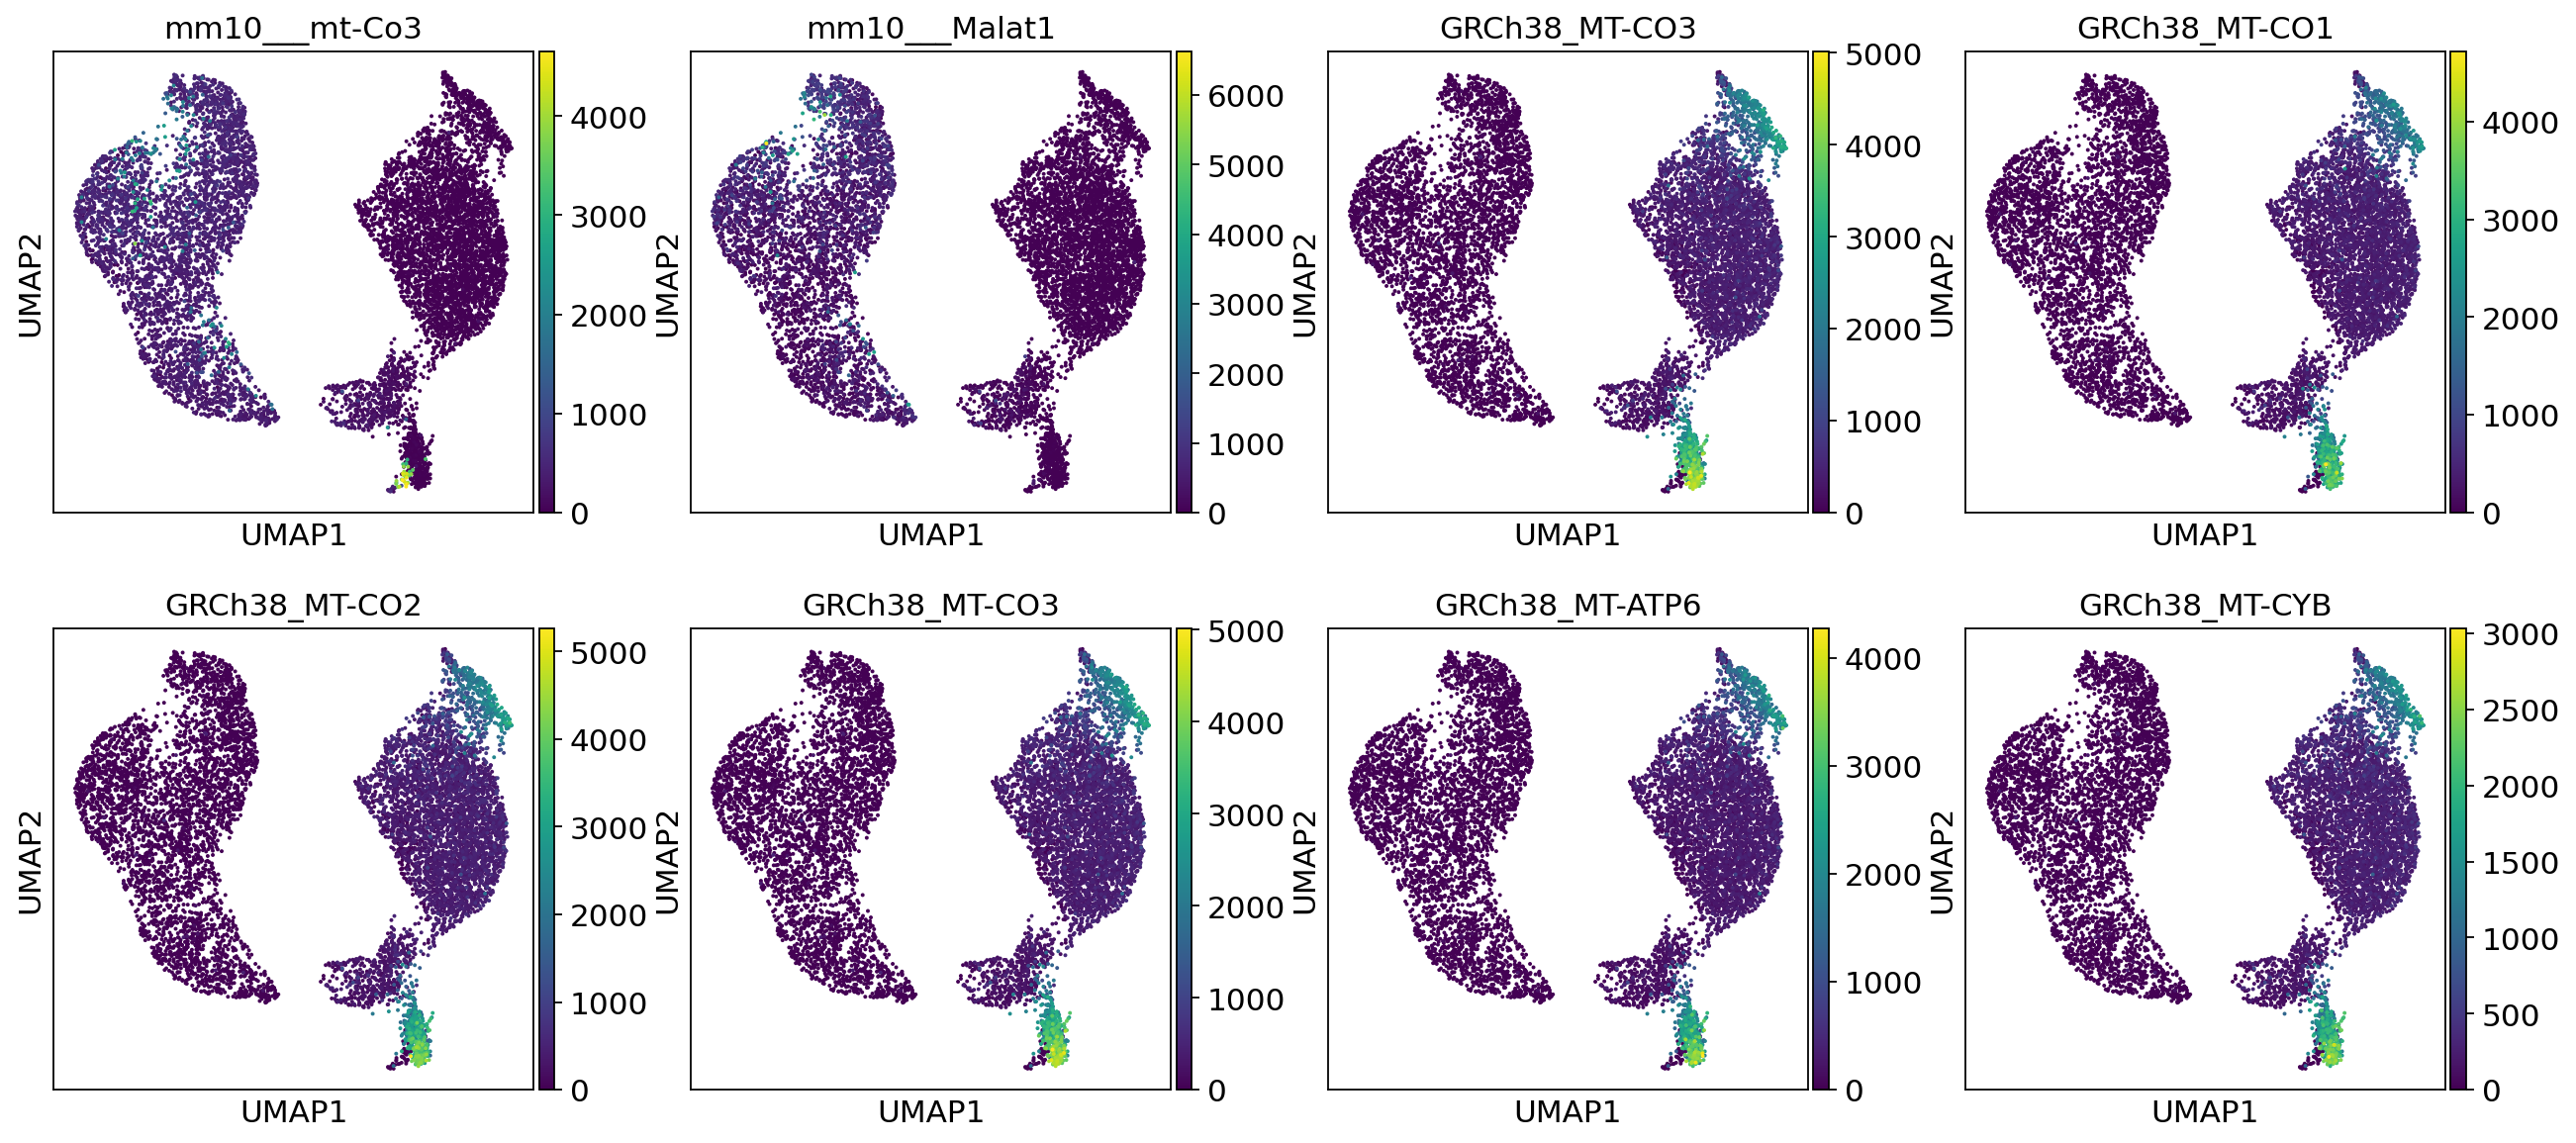

In [74]:
#PLOT FOR TOP 8 Highest Expression Genes
sc.pl.umap(adata3, color=[ 'mm10___mt-Co3','mm10___Malat1','GRCh38_MT-CO3','GRCh38_MT-CO1','GRCh38_MT-CO2','GRCh38_MT-CO3','GRCh38_MT-ATP6','GRCh38_MT-CYB'])

In [75]:
#using leiden for clustering
!pip3 install leidenalg
sc.tl.leiden(adata3, key_added='clusters', resolution=0.5)

running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


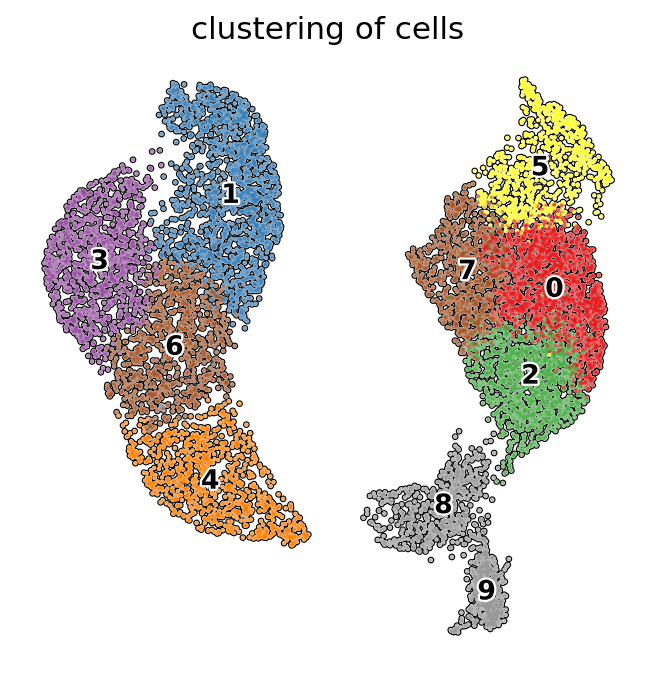

In [76]:
sc.tl.leiden(adata3, key_added='clusters', resolution=0.5)
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata3, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [77]:
adata3.var_names

Index(['GRCh38_LINC01409', 'GRCh38_LINC01128', 'GRCh38_LINC02593',
       'GRCh38_SAMD11', 'GRCh38_AL645608.7', 'GRCh38_HES4', 'GRCh38_ISG15',
       'GRCh38_AGRN', 'GRCh38_C1orf159', 'GRCh38_SDF4',
       ...
       'mm10___Mid1', 'mm10___Eif2s3y', 'mm10___Ddx3y', 'mm10___mt-Atp8',
       'mm10___mt-Nd3', 'mm10___mt-Nd4l', 'mm10___mt-Nd5', 'mm10___mt-Nd6',
       'mm10___Tmlhe', 'mm10___AC149090.1'],
      dtype='object', length=10288)

In [78]:
adata3

AnnData object with n_obs × n_vars = 9545 × 10288
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

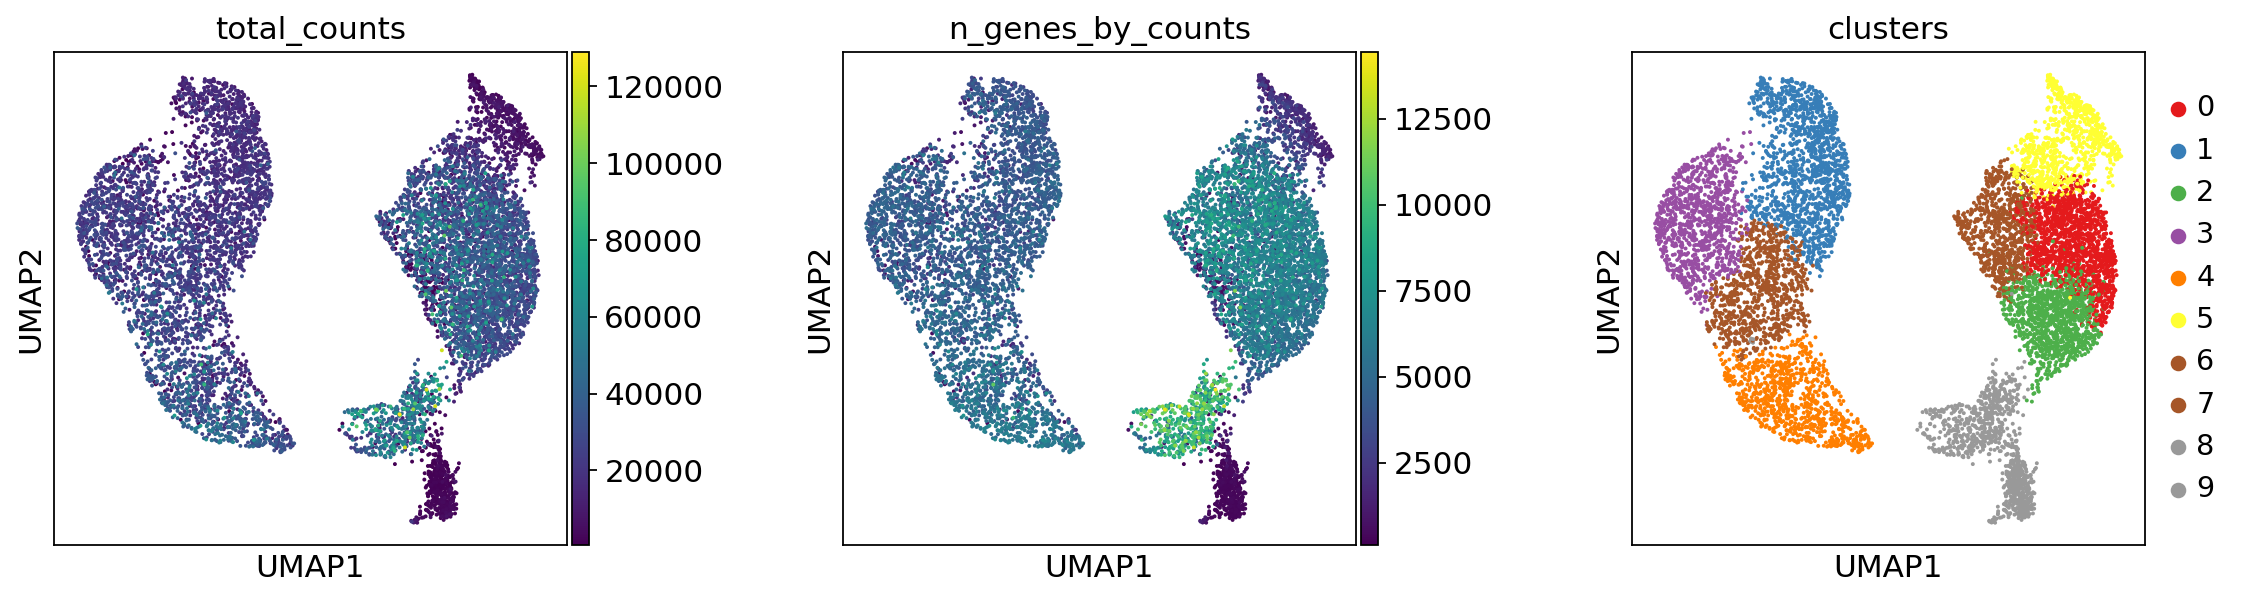

In [79]:
#UMAP of counts and clusters
sc.pl.umap(adata3, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

**Visualizing gene markers**

In [80]:
#give rank to genes
sc.tl.rank_genes_groups(adata3, groupby='clusters', method='wilcoxon')

ranking genes


/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:48)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`


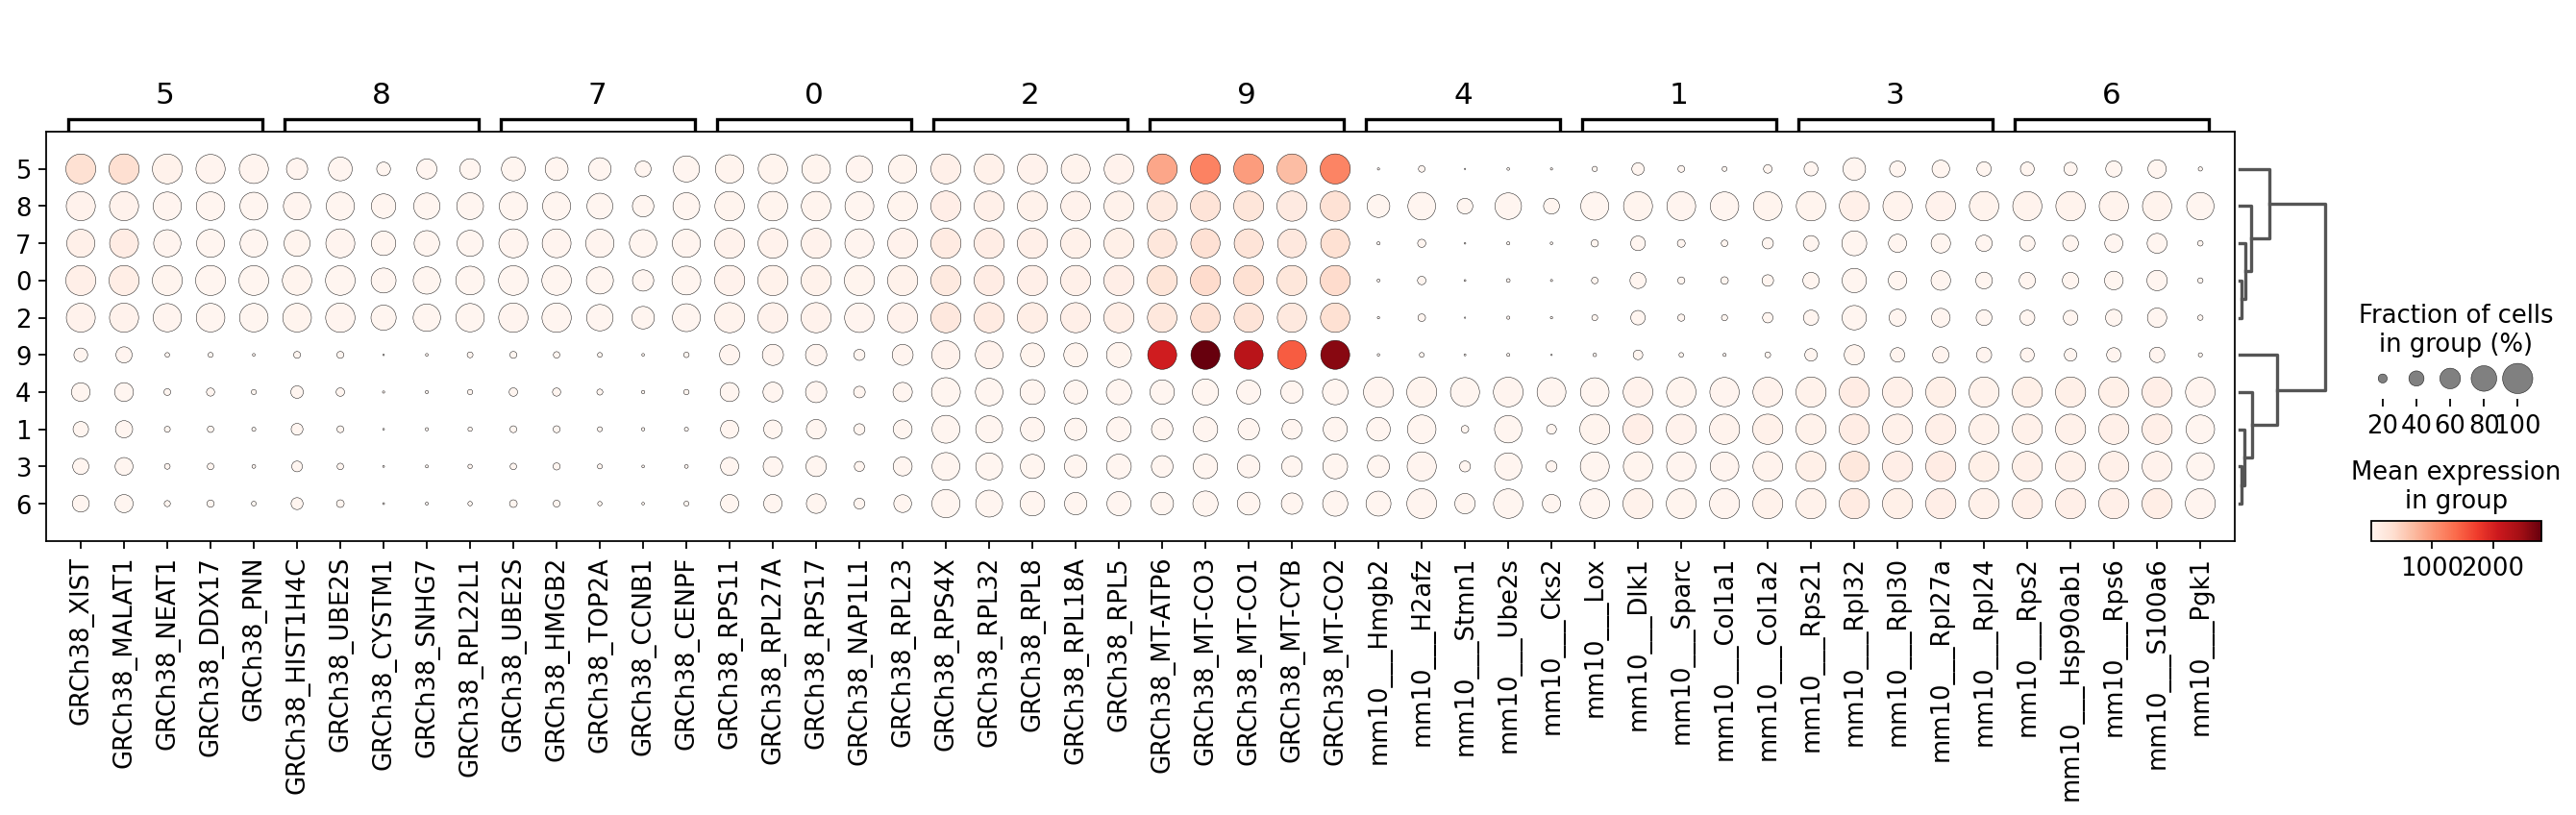

In [81]:
#DISPLAY TOP 5 genes
sc.pl.rank_genes_groups_dotplot(adata3, n_genes=5)

**logfold**

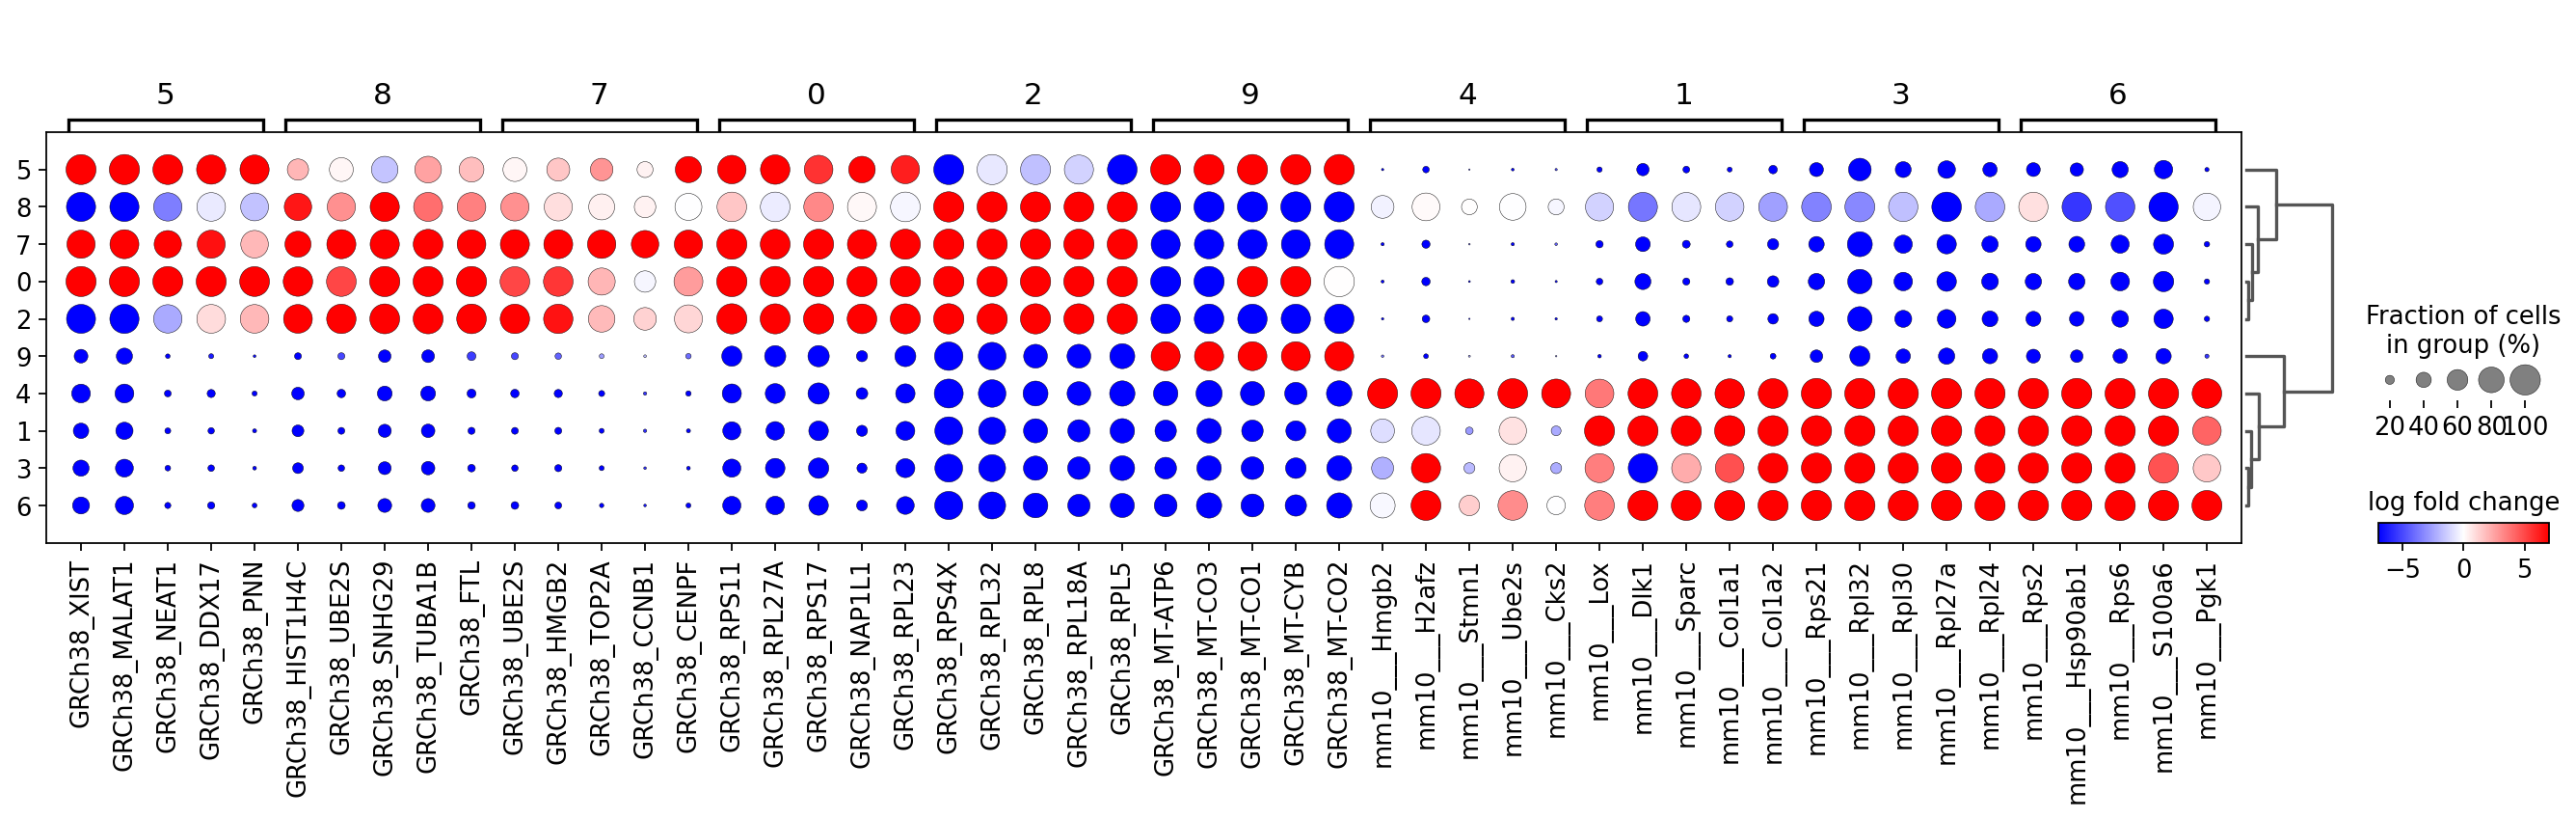

In [82]:
#making a logfold of the genes
sc.pl.rank_genes_groups_dotplot(adata3, n_genes=5, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

**Heatmap**

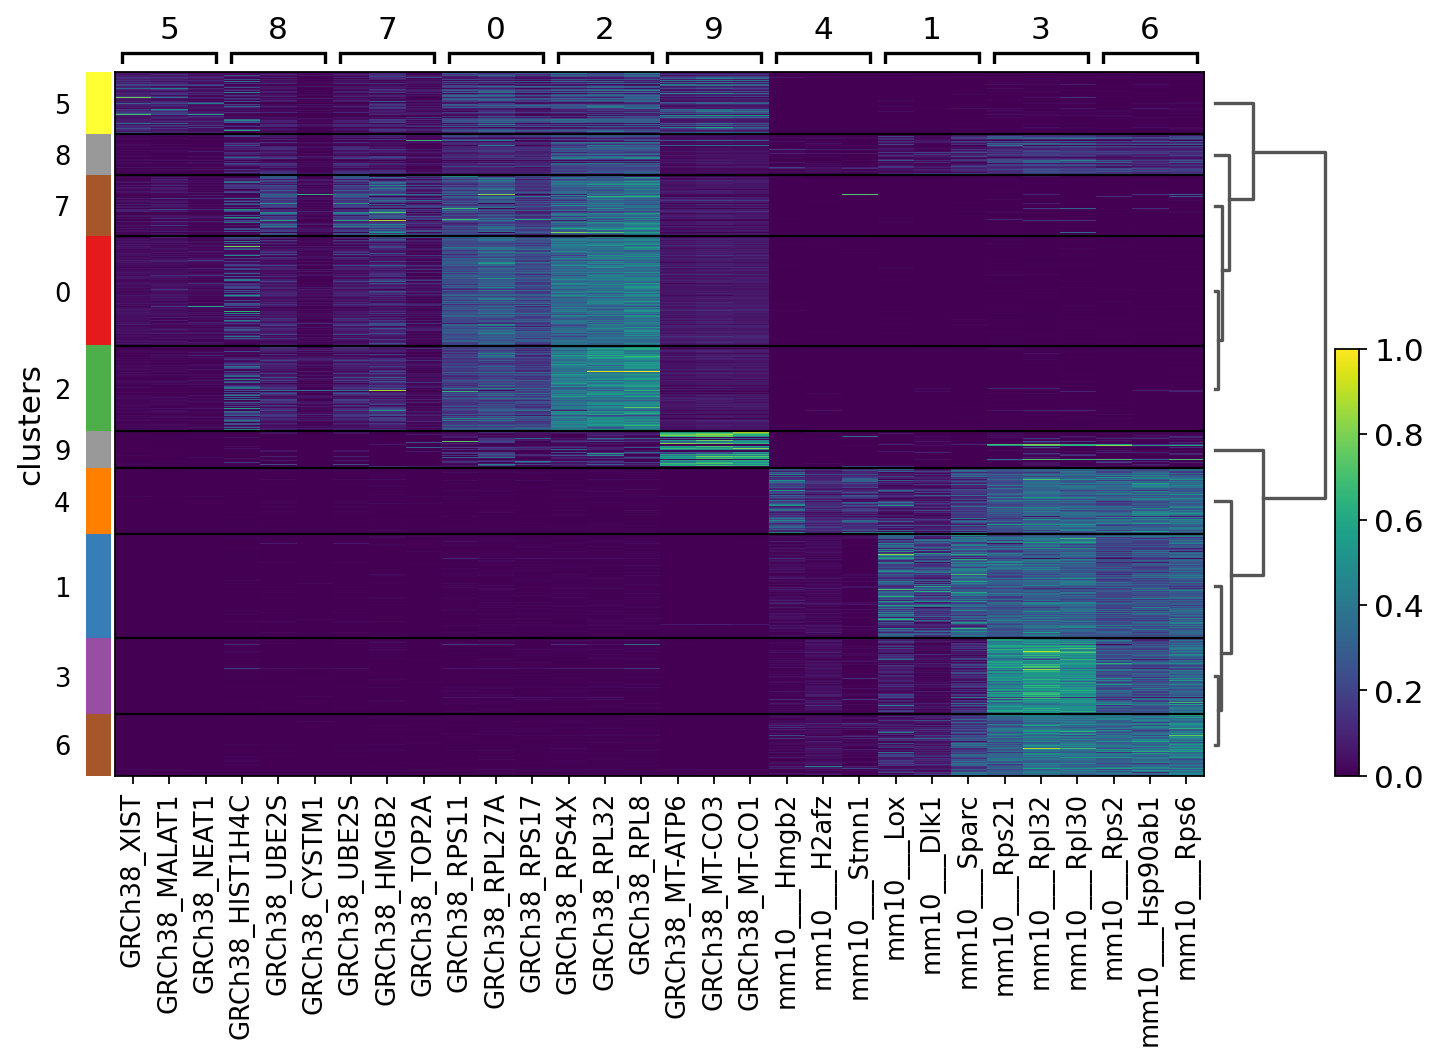

In [83]:

sc.pl.rank_genes_groups_heatmap(adata3, n_genes=3, standard_scale='var')


**tSNE**

In [84]:
sc.tl.tsne(adata3,random_state=2,n_pcs=10)


computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:12)


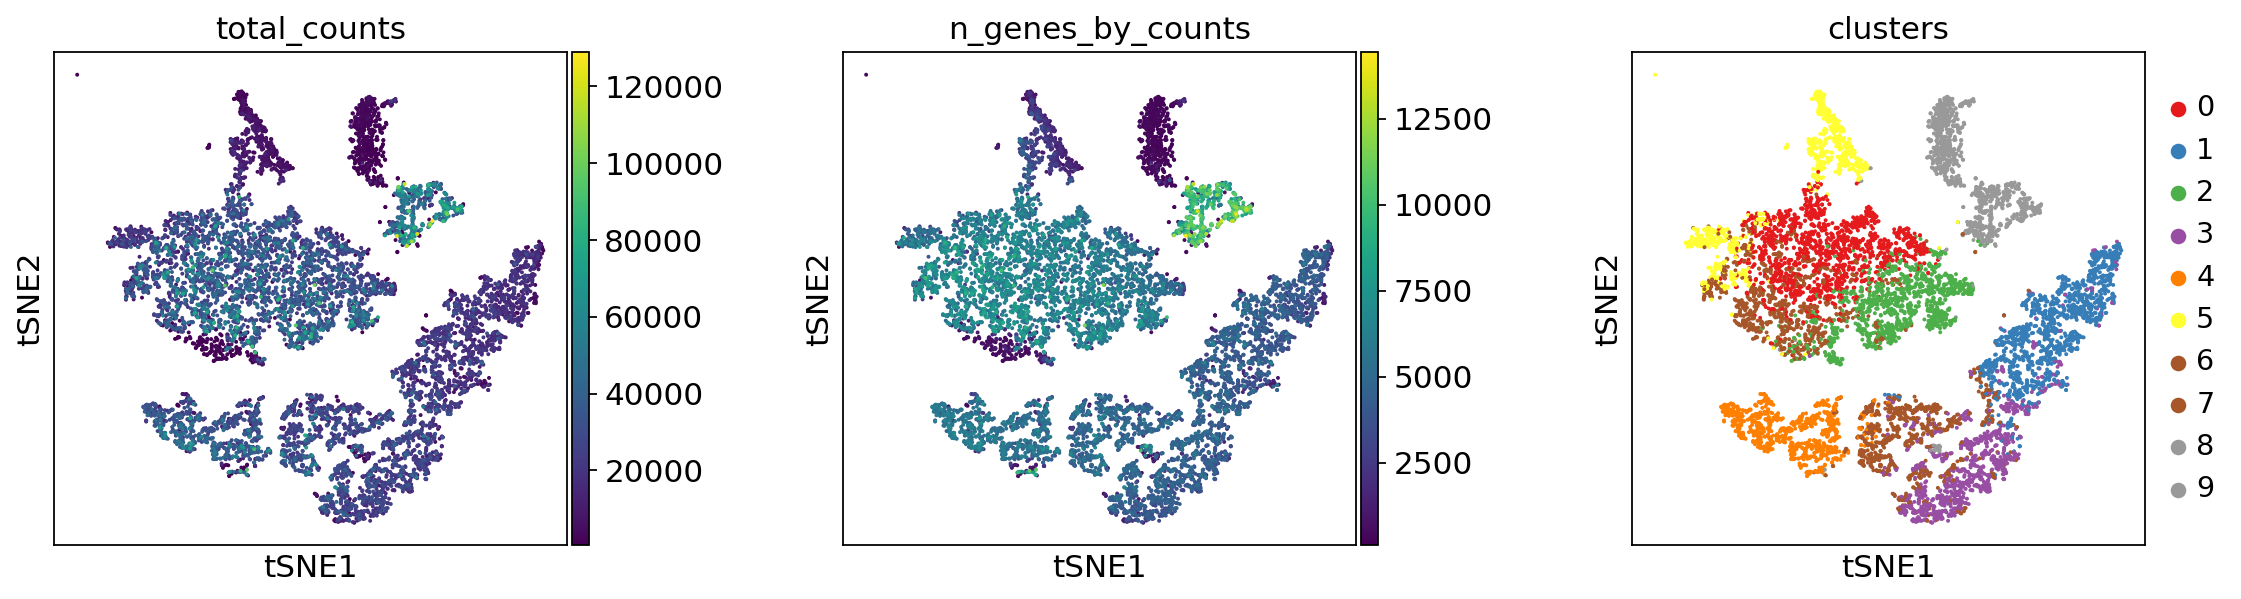

In [85]:
sc.pl.tsne(adata3,color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [86]:
adata3.write(results_file)